In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kylek\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
tweetsAndLabels = pd.read_csv('MajorityVote.csv',)
tweetsAndLabels['Created'] = pd.to_datetime(tweetsAndLabels['Created'])
#tweetsAndLabels.set_index('Created',inplace = True)
tweetsAndLabels = tweetsAndLabels.iloc[0:3499]
#instantiating a sentiment intensity analyzer object
sid = SentimentIntensityAnalyzer()
#replacing NAs with '' for concatenating 'Full Text' and 'Quoted Full Text'
tweetsAndLabels = tweetsAndLabels.replace(np.nan, '', regex=True)
#concatenating 'Full Text' and 'Quoted Full Text'
tweetsAndLabels['Full Text'] = tweetsAndLabels['Full Text'] + ' ' + tweetsAndLabels['Quote Full Text']
#Getting all of the sentiment scores
sentiment_scores = tweetsAndLabels['Full Text'].apply(sid.polarity_scores)
#Turning the sentiment_scores object into a dataframe
sentiment_scores = pd.DataFrame.from_dict(sentiment_scores.to_dict(), orient = 'index')

In [17]:
#Getting the sentiment scores sepcific for the tweets that is labeled for 'Perceived Barriers'
#BarriersSentiment = sentiment_scores[(tweetsAndLabels['Perceived Benefits'] == 0) & (tweetsAndLabels['Perceived Barriers'] == 1) & (tweetsAndLabels['Perceived Severity'] == 0) & (tweetsAndLabels['Perceived Susceptibility'] == 0)]
#BarriersSentiment['Created'] = tweetsAndLabels[(tweetsAndLabels['Perceived Benefits'] == 0) & (tweetsAndLabels['Perceived Barriers'] == 1) & (tweetsAndLabels['Perceived Severity'] == 0) & (tweetsAndLabels['Perceived Susceptibility'] == 0)]['Created']
BarriersSentiment = sentiment_scores[tweetsAndLabels['Perceived Barriers'] == 1]
BarriersSentiment['Created'] = tweetsAndLabels[tweetsAndLabels['Perceived Barriers'] == 1]['Created']
BarriersSentiment.set_index('Created',inplace = True)
BarriersSentimentWeekly = BarriersSentiment.resample('1 w').mean()

C:\Users\kylek\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
#Getting the sentiment scores sepcific for the tweets that is only labeled for 'Perceived Benefits'
#BenefitsSentiment = sentiment_scores[(tweetsAndLabels['Perceived Benefits'] == 1) & (tweetsAndLabels['Perceived Barriers'] == 0) & (tweetsAndLabels['Perceived Severity'] == 0) & (tweetsAndLabels['Perceived Susceptibility'] == 0)]
#BenefitsSentiment['Created'] = tweetsAndLabels[(tweetsAndLabels['Perceived Benefits'] == 1) & (tweetsAndLabels['Perceived Barriers'] == 0) & (tweetsAndLabels['Perceived Severity'] == 0) & (tweetsAndLabels['Perceived Susceptibility'] == 0)]['Created']
BenefitsSentiment = sentiment_scores[tweetsAndLabels['Perceived Benefits'] == 1]
BenefitsSentiment['Created'] = tweetsAndLabels[tweetsAndLabels['Perceived Benefits'] == 1]['Created']
BenefitsSentiment.set_index('Created',inplace = True)
BenefitsSentimentWeekly = BenefitsSentiment.resample('1 w').mean()


C:\Users\kylek\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
#Getting the sentiment scores sepcific for the tweets that is labeled for 'Perceived Benefits'
#SusceptibilitySentiment = sentiment_scores[(tweetsAndLabels['Perceived Benefits'] == 0) & (tweetsAndLabels['Perceived Barriers'] == 0) & (tweetsAndLabels['Perceived Severity'] == 0) & (tweetsAndLabels['Perceived Susceptibility'] == 1)]
#SusceptibilitySentiment['Created'] = tweetsAndLabels[(tweetsAndLabels['Perceived Benefits'] == 0) & (tweetsAndLabels['Perceived Barriers'] == 0) & (tweetsAndLabels['Perceived Severity'] == 0) & (tweetsAndLabels['Perceived Susceptibility'] == 1)]['Created']
SusceptibilitySentiment = sentiment_scores[tweetsAndLabels['Perceived Susceptibility'] == 1]
SusceptibilitySentiment['Created'] = tweetsAndLabels[tweetsAndLabels['Perceived Susceptibility'] == 1]['Created']
SusceptibilitySentiment.set_index('Created',inplace = True)
SusceptibilitySentimentWeekly = SusceptibilitySentiment.resample('1 w').mean()

C:\Users\kylek\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [20]:
#Getting the sentiment scores sepcific for the tweets that is labeled for 'Perceived Severity'
#SeveritySentiment = sentiment_scores[(tweetsAndLabels['Perceived Benefits'] == 0) & (tweetsAndLabels['Perceived Barriers'] == 0) & (tweetsAndLabels['Perceived Severity'] == 1) & (tweetsAndLabels['Perceived Susceptibility'] == 0)]
#SeveritySentiment['Created'] = tweetsAndLabels[(tweetsAndLabels['Perceived Benefits'] == 0) & (tweetsAndLabels['Perceived Barriers'] == 0) & (tweetsAndLabels['Perceived Severity'] == 1) & (tweetsAndLabels['Perceived Susceptibility'] == 0)]['Created']
SeveritySentiment = sentiment_scores[tweetsAndLabels['Perceived Severity'] == 1]
SeveritySentiment['Created'] = tweetsAndLabels[tweetsAndLabels['Perceived Severity'] == 1]['Created']
SeveritySentiment.set_index('Created',inplace = True)
SeveritySentimentWeekly = SeveritySentiment.resample('1 w').mean()

C:\Users\kylek\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


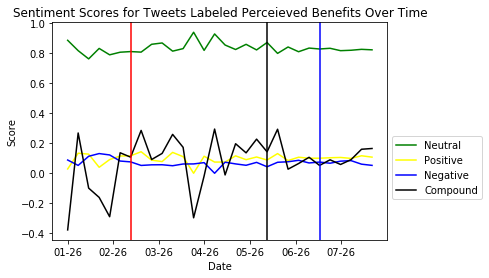

In [27]:
#Plotting the Sentiment Scores For Tweets Labeled 'Perceieved Benefits Over Time'
plt.plot(BenefitsSentimentWeekly.index.week,BenefitsSentimentWeekly['neu'], color = 'green')
plt.plot(BenefitsSentimentWeekly.index.week,BenefitsSentimentWeekly['pos'], color = 'yellow')
plt.plot(BenefitsSentimentWeekly.index.week,BenefitsSentimentWeekly['neg'], color = 'blue')
plt.plot(BenefitsSentimentWeekly.index.week,BenefitsSentimentWeekly['compound'], color = 'black')

plt.title('Sentiment Scores for Tweets Labeled Perceieved Benefits Over Time')
plt.legend(('Neutral', 'Positive','Negative','Compound'),bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Date'); plt.ylabel('Score')
plt.xticks(np.arange(min(BenefitsSentimentWeekly.index.week), max(BenefitsSentimentWeekly.index.week), 4.34524),['01-26', '02-26', '03-26','04-26','05-26','06-26','07-26'])

#Getting the vertical lines for events
WhoNoMask = datetime.datetime(2020, 3, 6)
WhoYesMask = datetime.datetime(2020, 6, 5)
TrumpWearsMask = datetime.datetime(2020,7,12)
xcoords = [int(WhoNoMask.strftime("%V")), int(WhoYesMask.strftime("%V")),int(TrumpWearsMask.strftime("%V"))]
colors = ['r','k','b']
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
plt.show()


                                             



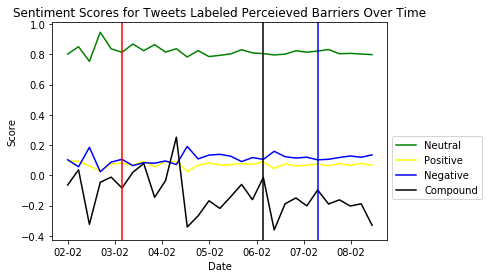

In [22]:
#Plotting the Sentiment Scores For Tweets Labeled 'Perceieved Benefits Over Time'
plt.plot(BarriersSentimentWeekly.index.week,BarriersSentimentWeekly['neu'], color = 'green')
plt.plot(BarriersSentimentWeekly.index.week,BarriersSentimentWeekly['pos'], color = 'yellow')
plt.plot(BarriersSentimentWeekly.index.week,BarriersSentimentWeekly['neg'], color = 'blue')
plt.plot(BarriersSentimentWeekly.index.week,BarriersSentimentWeekly['compound'], color = 'black')

plt.title('Sentiment Scores for Tweets Labeled Perceieved Barriers Over Time')
plt.legend(('Neutral', 'Positive','Negative','Compound'), bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Date'); plt.ylabel('Score')
plt.xticks(np.arange(min(BarriersSentimentWeekly.index.week), max(BarriersSentimentWeekly.index.week), 4.34524),['02-02', '03-02', '04-02','05-02','06-02','07-02','08-02'])

#Getting the vertical lines for events
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
plt.show()


                      

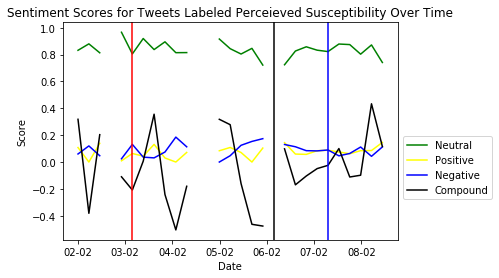

In [23]:
#Plotting the Sentiment Scores For Tweets Labeled 'Perceieved Susceptibility Over Time'
plt.plot(SusceptibilitySentimentWeekly.index.week,SusceptibilitySentimentWeekly['neu'], color = 'green')
plt.plot(SusceptibilitySentimentWeekly.index.week,SusceptibilitySentimentWeekly['pos'], color = 'yellow')
plt.plot(SusceptibilitySentimentWeekly.index.week,SusceptibilitySentimentWeekly['neg'], color = 'blue')
plt.plot(SusceptibilitySentimentWeekly.index.week,SusceptibilitySentimentWeekly['compound'], color = 'black')


plt.title('Sentiment Scores for Tweets Labeled Perceieved Susceptibility Over Time')
plt.legend(('Neutral', 'Positive','Negative','Compound'), bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Date'); plt.ylabel('Score')
plt.xticks(np.arange(min(SusceptibilitySentimentWeekly.index.week), max(SusceptibilitySentimentWeekly.index.week), 4.34524),['02-02', '03-02', '04-02','05-02','06-02','07-02','08-02'])

#Getting the vertical lines for events
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
plt.show()



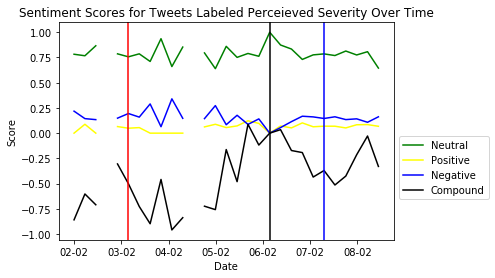

In [24]:
#Plotting the Sentiment Scores For Tweets Labeled 'Perceieved Severity Over Time'
plt.plot(SeveritySentimentWeekly.index.week,SeveritySentimentWeekly['neu'], color = 'green')
plt.plot(SeveritySentimentWeekly.index.week,SeveritySentimentWeekly['pos'], color = 'yellow')
plt.plot(SeveritySentimentWeekly.index.week,SeveritySentimentWeekly['neg'], color = 'blue')
plt.plot(SeveritySentimentWeekly.index.week,SeveritySentimentWeekly['compound'], color = 'black')

plt.title('Sentiment Scores for Tweets Labeled Perceieved Severity Over Time')
plt.legend(('Neutral', 'Positive','Negative','Compound'), bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Date'); plt.ylabel('Score')
plt.xticks(np.arange(min(SeveritySentimentWeekly.index.week), max(SeveritySentimentWeekly.index.week), 4.34524),['02-02', '03-02', '04-02','05-02','06-02','07-02','08-02'])

#Getting the vertical lines for events
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
plt.show()


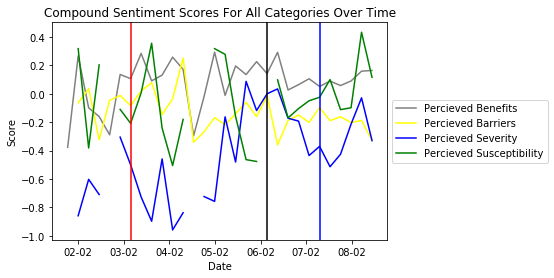

In [25]:
#Ploting all of the Compound Sentiment Scores over time
#Plotting the Sentiment Scores For Tweets Labeled 'Perceieved Severity Over Time'
plt.plot(BenefitsSentimentWeekly.index.week,BenefitsSentimentWeekly['compound'], color = 'grey')
plt.plot(BarriersSentimentWeekly.index.week,BarriersSentimentWeekly['compound'], color = 'yellow')
plt.plot(SeveritySentimentWeekly.index.week,SeveritySentimentWeekly['compound'], color = 'blue')
plt.plot(SusceptibilitySentimentWeekly.index.week,SusceptibilitySentimentWeekly['compound'], color = 'green')


plt.title('Compound Sentiment Scores For All Categories Over Time')
plt.legend(('Percieved Benefits', 'Percieved Barriers','Percieved Severity','Percieved Susceptibility'),loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Date'); plt.ylabel('Score')
plt.xticks(np.arange(min(SeveritySentimentWeekly.index.week), max(SeveritySentimentWeekly.index.week), 4.34524),['02-02', '03-02', '04-02','05-02','06-02','07-02','08-02'])

#Getting the vertical lines for events
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
plt.show()


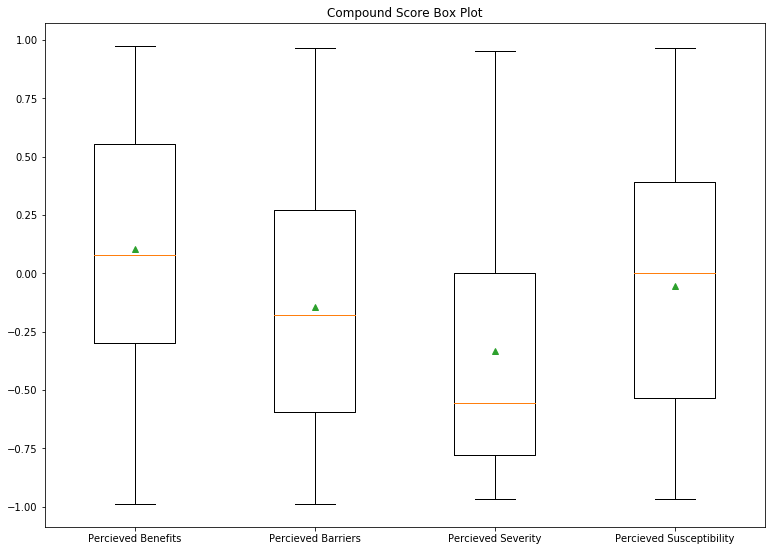

In [26]:
#Boxplot of Compound Sentiment Scores of the Four Categories

data = [BenefitsSentiment['compound'],BarriersSentiment['compound'],SeveritySentiment['compound'],SusceptibilitySentiment['compound']]
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.boxplot(data,showmeans=True) 
ax.set_xticklabels(['Percieved Benefits', 'Percieved Barriers','Percieved Severity','Percieved Susceptibility']) 
plt.title("Compound Score Box Plot") 
plt.show()

0.15185108077360612